# Classification

Where regression was used to predict a numeric value, classification is used to seperate data points into classes of different labels. In this example we will use a TensorFlow estimator to classify flowers.

This example was provided by the TensorFlow [website](https://www.tensorflow.org/tutorials/estimator/premade). 

## Problem overview

The dataset seperates flowers into 3 different classes of species.

* Setosa
* Versicolor
* Virginica

Each flower has four features:

* sepal length
* sepal width
* petal length
* petal width

Data location:
* train data: https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv
* evaluation data: https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv

## Download the data

In [1]:
import tensorflow as tf

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

## Loading data with pandas

In [2]:
import pandas as pd

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

### Explore the data

In [3]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [4]:
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [5]:
print(train.shape, test.shape)

(120, 5) (30, 5)


#### Sepal length distribution

<AxesSubplot:>

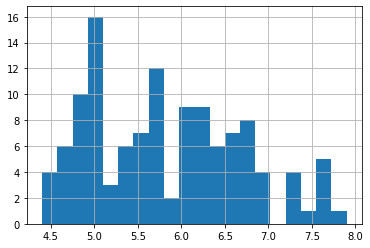

In [6]:
train.SepalLength.hist(bins=20)

#### Species distribution

<AxesSubplot:>

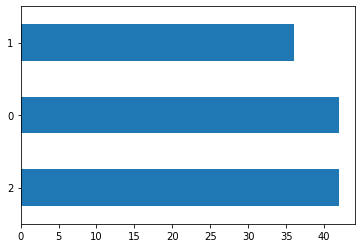

In [7]:
train.Species.value_counts().plot(kind='barh')

### Getting the target variable column

In [8]:
train_y = train.pop('Species')
test_y = test.pop('Species')

In [9]:
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [10]:
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

### Features

In [11]:
my_feature_columns = []

#### Numerical data

In [12]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


#### Defining the model

This problem is a classic classification problem. Fortunately, TensorFlow provides several pre-made classifier Estimators, including:

* `tf.estimator.DNNClassifier` for deep models that perform multi-class classification.
* `tf.estimator.DNNLinearCombinedClassifier` for wide & deep models.
* `tf.estimator.LinearClassifier` for classifiers based on linear models.

For this problem, `tf.estimator.DNNClassifier` seems like the best choice. 
Here's how you instantiated this Estimator:

In [13]:
# Build a Deep Neural Network with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxw3xg5ro', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Organizing the input data

In [14]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

train_input_fn=lambda: input_fn(train, train_y, training=True)
eval_input_fn=lambda: input_fn(test, test_y, training=False)

#### Training the model with the organized input data

In [15]:
from IPython.display import clear_output

classifier.train(input_fn=train_input_fn, steps=5000)
#clear_output()

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpxw3xg5ro/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 2.4649198, step = 0
INFO:tensorflow:global_step/sec: 558.779
INFO:tensorflow:loss = 1.1674706, step = 100 (0.180 sec)
INFO:tensorflow:global_step/sec: 662.262
INFO:tensorflow:loss = 0.99301064, step = 200 (0.151 sec)
INFO:tensorflow:global_step/se

#### Evaluating

In [16]:
eval_result = classifier.evaluate(eval_input_fn)

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-10-13T13:21:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxw3xg5ro/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.24860s
INFO:tensorflow:Finished evaluation at 2021-10-13-13:21:00
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9, average_loss = 0.4882456, global_step = 5000, loss = 0.4882456
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpxw3xg5ro/model.ckpt-5000

Test set accuracy: 0.900



### Prediction

In [17]:
def input_fn(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

SPECIES = ['Setosa', 'Versicolor', 'Virginica'] # for class_ids = [0,1,2]

In [18]:
#defining the input
predict = {'SepalLength': [5.1], 'SepalWidth': [3.3], 'PetalLength': [1.7], 'PetalWidth': [0.5]}
#predict = {'SepalLength': [6.9], 'SepalWidth': [3.1], 'PetalLength': [5.4], 'PetalWidth': [2.1]}
#predict = {'SepalLength': [5.9], 'SepalWidth': [3.0], 'PetalLength': [4.2], 'PetalWidth': [1.5]}

#making the prediction
prediction = list(classifier.predict(input_fn=lambda: input_fn(predict)))

#getting the desired output
prediction1 = dict(prediction[-1])
class_id = prediction1['class_ids'][0]
probability = prediction1['probabilities'][class_id]

#printing
print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id], 100 * probability))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxw3xg5ro/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (80.3%)
